In [1]:
#Logistic Regression with Python
#I have tried to predict a classification: will graduate or will drop out.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt;
import seaborn as sns
from sklearn.preprocessing import StandardScaler

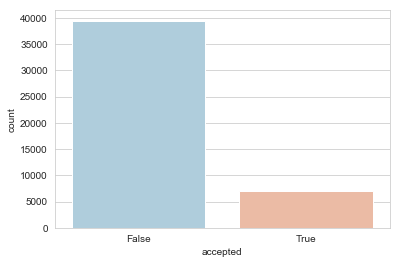

In [3]:
data_score = pd.read_csv("score_board.csv")

#Exploratory Data Analysis: patterns and visualisaions

#Accepted
sns.set_style('whitegrid')
sns.countplot(x='accepted',data=data_score,palette='RdBu_r')

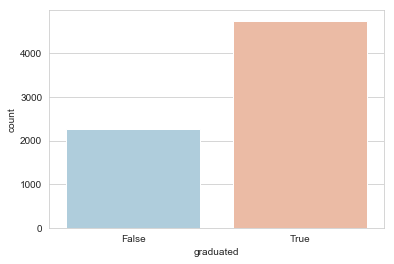

In [4]:
data_grad = pd.read_csv("graduates.csv")

#Graduated
sns.set_style('whitegrid')
sns.countplot(x='graduated',data=data_grad,palette='RdBu_r')

In [5]:
#combine data sets into one full data set
train_unfiltered = pd.merge(data_score, data_grad, how='left')
train = train_unfiltered.drop(train_unfiltered[train_unfiltered["accepted"] == False].index, inplace=False).reset_index(drop=True)
train.head()

,id,year,gpa,maths_exam,art_exam,language_exam,social_activity,essay_score,interview_score,score,accepted,graduated
0,CS-1980-00002,1980,3.743429,0.898700,0.978949,0.937879,4,0.991515,0.999604,857,True,False
1,CS-1980-00004,1980,3.047625,0.993001,0.950673,0.763701,5,0.996858,0.949954,841,True,True
2,CS-1980-00007,1980,2.897191,0.718591,0.941583,0.489207,4,0.980957,0.912487,811,True,True
3,CS-1980-00008,1980,3.948450,0.953325,0.981074,0.914729,1,0.999489,0.997138,875,True,False
4,CS-1980-00012,1980,3.939870,0.452506,0.952712,0.974585,4,0.940924,0.973076,790,True,True


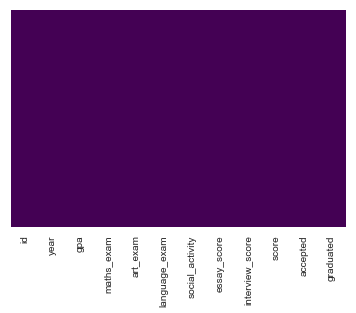

In [6]:
#We can use seaborn to create a simple heatmap to see if/where we are missing data
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [7]:
#There are no missing values in the train data set

#Features: id, year are unlikely to yield any useful information and therefore will be dropped entirely. Feature accepted can be omitted as well.

#train dataset column types information
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7009 entries, 0 to 7008
Data columns (total 12 columns):
id                 7009 non-null object
year               7009 non-null int64
gpa                7009 non-null float64
maths_exam         7009 non-null float64
art_exam           7009 non-null float64
language_exam      7009 non-null float64
social_activity    7009 non-null int64
essay_score        7009 non-null float64
interview_score    7009 non-null float64
score              7009 non-null int64
accepted           7009 non-null bool
graduated          7009 non-null object
dtypes: bool(1), float64(6), int64(3), object(2)
memory usage: 609.3+ KB


In [8]:
#Data Cleaning: dropping columns
train = train.drop(['id','year','accepted'], axis = 1, inplace=False)
train.head()

,gpa,maths_exam,art_exam,language_exam,social_activity,essay_score,interview_score,score,graduated
0,3.743429,0.898700,0.978949,0.937879,4,0.991515,0.999604,857,False
1,3.047625,0.993001,0.950673,0.763701,5,0.996858,0.949954,841,True
2,2.897191,0.718591,0.941583,0.489207,4,0.980957,0.912487,811,True
3,3.948450,0.953325,0.981074,0.914729,1,0.999489,0.997138,875,False
4,3.939870,0.452506,0.952712,0.974585,4,0.940924,0.973076,790,True


In [9]:
#Converting booleans to numerical data
train['graduated'] = train['graduated'].astype('int')
    
train.head()

,gpa,maths_exam,art_exam,language_exam,social_activity,essay_score,interview_score,score,graduated
0,3.743429,0.898700,0.978949,0.937879,4,0.991515,0.999604,857,0
1,3.047625,0.993001,0.950673,0.763701,5,0.996858,0.949954,841,1
2,2.897191,0.718591,0.941583,0.489207,4,0.980957,0.912487,811,1
3,3.948450,0.953325,0.981074,0.914729,1,0.999489,0.997138,875,0
4,3.939870,0.452506,0.952712,0.974585,4,0.940924,0.973076,790,1


In [10]:
#Calculating avarage values
#Analysing how having a score above avarage affects a students potential for graduation
def cat(*args):
    for i in args:
        mean = train[i].mean()
        df = (train.loc[(train['graduated'] == 1) & (train[i] > mean)])
        above_avg = df[i].count()

        total_grads = sum(train['graduated']==1)
        percent = round((above_avg/total_grads)*100)
        print(str(percent) +  "% " + "of gradutes had a " + str(i) + " score " + "higher than avarage of " + str(round(mean, 2)))
    
cat('gpa', 'maths_exam', 'art_exam', 'language_exam', 'essay_score', 'interview_score')

63.0% of gradutes had a gpa score higher than avarage of 3.59
72.0% of gradutes had a maths_exam score higher than avarage of 0.85
68.0% of gradutes had a art_exam score higher than avarage of 0.82
68.0% of gradutes had a language_exam score higher than avarage of 0.81
78.0% of gradutes had a essay_score score higher than avarage of 0.93
78.0% of gradutes had a interview_score score higher than avarage of 0.94


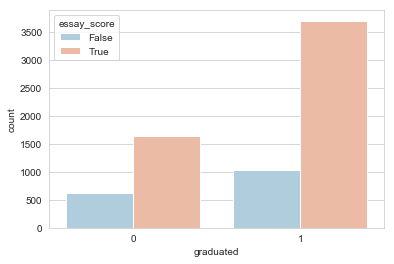

In [11]:
#Almost 80% of graduates had essay and interview scores above avarage. We can use these finding to engineer new features.

# Proportion of graduates with essay score above avarage(True)
es_mean = (train['essay_score'].mean())
esm_above = (train['essay_score'] > es_mean)

df = pd.concat([train['graduated'], esm_above], axis=1)
sns.set_style('whitegrid')
sns.countplot(x='graduated',hue='essay_score',data=df,palette='RdBu_r')

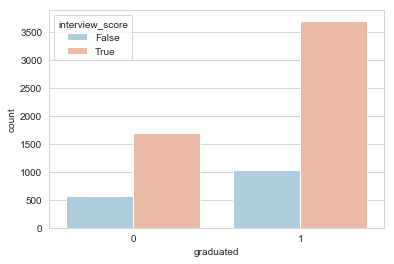

In [12]:
# Proportion of graduates with interview score above avarage(True)
is_mean = (train['interview_score'].mean())
ism_above = (train['interview_score'] > is_mean)

df = pd.concat([train['graduated'], ism_above], axis=1)
sns.set_style('whitegrid')
sns.countplot(x='graduated',hue='interview_score',data=df,palette='RdBu_r')

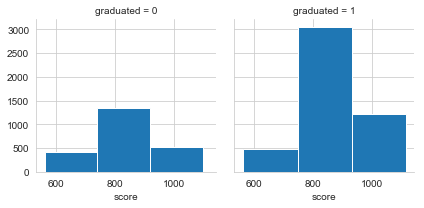

In [13]:
#More visualisations
g = sns.FacetGrid(train, col='graduated')
g.map(plt.hist, 'score', bins=3)

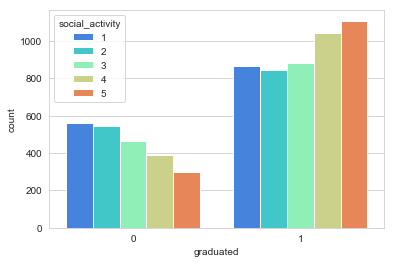

In [14]:
sns.set_style('whitegrid')
sns.countplot(x='graduated',hue='social_activity',data=train,palette='rainbow')

In [15]:
#feature engineering: es_above_avg for student with essey score above avarage
es_mean = (train['essay_score'].mean())
print(es_mean)
train['es_above_avg'] = train['essay_score'].map(lambda x: 0 if x < es_mean else 1)

train.head()

0.9346691439892952


,gpa,maths_exam,art_exam,language_exam,social_activity,essay_score,interview_score,score,graduated,es_above_avg
0,3.743429,0.898700,0.978949,0.937879,4,0.991515,0.999604,857,0,1
1,3.047625,0.993001,0.950673,0.763701,5,0.996858,0.949954,841,1,1
2,2.897191,0.718591,0.941583,0.489207,4,0.980957,0.912487,811,1,1
3,3.948450,0.953325,0.981074,0.914729,1,0.999489,0.997138,875,0,1
4,3.939870,0.452506,0.952712,0.974585,4,0.940924,0.973076,790,1,1


In [16]:
#feature engineering: is_above_avg for student with interview score above avarage
is_mean = (train['interview_score'].mean())
print(is_mean)
train['is_above_avg'] = train['interview_score'].map(lambda x: 0 if x < is_mean else 1)
train.head(10)

0.9365320336186802


,gpa,maths_exam,art_exam,language_exam,social_activity,essay_score,interview_score,score,graduated,es_above_avg,is_above_avg
0,3.743429,0.898700,0.978949,0.937879,4,0.991515,0.999604,857,0,1,1
1,3.047625,0.993001,0.950673,0.763701,5,0.996858,0.949954,841,1,1,1
2,2.897191,0.718591,0.941583,0.489207,4,0.980957,0.912487,811,1,1,0
3,3.948450,0.953325,0.981074,0.914729,1,0.999489,0.997138,875,0,1,1
4,3.939870,0.452506,0.952712,0.974585,4,0.940924,0.973076,790,1,1,1
5,3.556771,0.982567,0.935440,0.986107,1,0.988830,0.736873,797,0,1,0
6,3.538080,0.995407,0.747386,0.925492,2,0.944370,0.999254,837,1,1,1
7,3.416580,0.758568,0.650531,0.936170,4,0.562112,0.994112,771,1,0,1
8,3.911870,0.992757,0.993585,0.948555,4,0.997801,0.998746,817,1,1,1
9,3.214185,0.588444,0.804121,0.910174,1,0.984017,0.997593,762,1,1,1


In [17]:
# Split into train and test dataset
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(train.drop('graduated',axis=1), 
                                                    train['graduated'], test_size=0.20, 
                                                    random_state=101)

In [18]:
#Applying Logistic Regression
from sklearn.linear_model import LogisticRegression

In [19]:
logmodel = LogisticRegression(solver='lbfgs', max_iter=200)
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=200, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [20]:
predictions = logmodel.predict(X_test)
X_test.head()

,gpa,maths_exam,art_exam,language_exam,social_activity,essay_score,interview_score,score,es_above_avg,is_above_avg
4789,3.829905,0.996713,0.959406,0.869368,4,0.959798,0.943763,766,1,1
4047,3.515381,0.770770,0.880333,0.990249,4,0.999194,0.998481,807,1,1
6110,3.824065,0.991848,0.880050,0.996263,3,0.999586,0.998435,799,1,1
133,3.754004,0.897025,0.779628,0.818264,4,0.951976,0.981549,828,1,1
4452,3.536419,0.910734,0.831441,0.400636,4,0.649345,0.859423,935,0,0


In [21]:
predictions[0:100]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1])

In [22]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,predictions))

[[ 54 399]
 [ 43 906]]


In [23]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.56      0.12      0.20       453
           1       0.69      0.95      0.80       949

   micro avg       0.68      0.68      0.68      1402
   macro avg       0.63      0.54      0.50      1402
weighted avg       0.65      0.68      0.61      1402

